In [1]:
# Import required packages
from os import chdir
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import pymysql
from pandasql import sqldf
import statsmodels.api as sm
from sklearn.cluster import KMeans

# Set working directory
wd="/Users/miniviafernandes/Desktop/dataset_diabetes"
chdir(wd)

In [2]:
# connect to database
host = '127.0.0.1'
user = 'root'
password = 'xxxport = 3306
db = 'hospitals'

# Connect to sql database with data inside
conn = pymysql.connect(host= host, port=port, user= user, passwd='9_Panoramic', db=db)


In [3]:
#Graph function

def graph(labels=None,data=None,color=None,title=None,ylabel=None,y_pos=None,graph_type=None):
    if graph_type == "bar":
        fig= plt.figure()
        ax= fig.add_subplot(111)
        ax.bar(labels,data, align='center',color=color,alpha=0.5)
        ax.set_facecolor('gray')
        plt.xticks(y_pos, labels,rotation=90)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()
    elif graph_type == "pie":
        fig=plt.figure()
        ax=fig.add_subplot(111)
        ax.pie(data, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.set_title(title)
        plt.show()

In [4]:
# Read full dataset and map different id codes
# pd.read_sql --> Read SQL query or database table into a DataFrame.

diabetes_df = pd.read_sql("""SELECT * ,
CASE
WHEN admission_type_id=1 THEN "Emergency"
WHEN admission_type_id=2 THEN "Urgent"
WHEN admission_type_id=3 THEN "Elective"
WHEN admission_type_id=4 THEN "Newborn"
WHEN admission_type_id=5 THEN "Not Available"
WHEN admission_type_id=6 THEN "NULL"
WHEN admission_type_id=7 THEN "Trauma Center"
ELSE null
END as admission_type_id_description,

CASE WHEN discharge_disposition_id=1 THEN "Discharged to home"
WHEN discharge_disposition_id=2 THEN "Discharged/transferred to another short term hospital"
WHEN discharge_disposition_id=3 THEN "Discharged/transferred to SNF"
WHEN discharge_disposition_id=4 THEN "Discharged/transferred to ICF"
WHEN discharge_disposition_id=5 THEN "Discharged/transferred to another type of inpatient care institution"
WHEN discharge_disposition_id=6 THEN "Discharged/transferred to home with home health service"
WHEN discharge_disposition_id=7 THEN "Left AMA"
WHEN discharge_disposition_id=8 THEN "Discharged/transferred to home under care of Home IV provider"
WHEN discharge_disposition_id=9 THEN "Admitted as an inpatient to this hospital"
WHEN discharge_disposition_id=10 THEN "Neonate discharged to another hospital for neonatal aftercare"
WHEN discharge_disposition_id=11 THEN "Expired"
WHEN discharge_disposition_id=12 THEN "Still patient or expected to return for outpatient services"
WHEN discharge_disposition_id=13 THEN "Hospice / home"
WHEN discharge_disposition_id=14 THEN "Hospice / medical facility"
WHEN discharge_disposition_id=15 THEN "Discharged/transferred within this institution to Medicare approved swing bed"
WHEN discharge_disposition_id=16 THEN "Discharged/transferred/referred another institution for outpatient services"
WHEN discharge_disposition_id=17 THEN "Discharged/transferred/referred to this institution for outpatient services"
WHEN discharge_disposition_id=18 THEN "NULL"
WHEN discharge_disposition_id=19 THEN "Expired at home. Medicaid only, hospice."
WHEN discharge_disposition_id=20 THEN "Expired in a medical facility. Medicaid only, hospice."
WHEN discharge_disposition_id=21 THEN "Expired, place unknown. Medicaid only, hospice."
WHEN discharge_disposition_id=22 THEN "Discharged/transferred to another rehab fac including rehab units of a hospital ."
WHEN discharge_disposition_id=23 THEN "Discharged/transferred to a long term care hospital."
WHEN discharge_disposition_id=24 THEN "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare."
WHEN discharge_disposition_id=25 THEN "Not Mapped"
WHEN discharge_disposition_id=26 THEN "Unknown/Invalid"
WHEN discharge_disposition_id=30 THEN "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere"
WHEN discharge_disposition_id=27 THEN "Discharged/transferred to a federal health care facility"
WHEN discharge_disposition_id=28 THEN "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital"
WHEN discharge_disposition_id=29 THEN "Discharged/transferred to a Critical Access Hospital (CAH)"
ELSE NULL
END as discharge_disposition_id_description,

CASE
WHEN admission_source_id=1 THEN " Physician Referral"
WHEN admission_source_id=2 THEN "Clinic Referral"
WHEN admission_source_id=3 THEN "HMO Referral"
WHEN admission_source_id=4 THEN "Transfer from a hospital"
WHEN admission_source_id=5 THEN " Transfer from a Skilled Nursing Facility (SNF)"
WHEN admission_source_id=6 THEN " Transfer from another health care facility"
WHEN admission_source_id=7 THEN " Emergency Room"
WHEN admission_source_id=8 THEN " Court/Law Enforcement"
WHEN admission_source_id=9 THEN " Not Available"
WHEN admission_source_id=10 THEN " Transfer from critial access hospital"
WHEN admission_source_id=11 THEN "Normal Delivery"
WHEN admission_source_id=12 THEN " Premature Delivery"
WHEN admission_source_id=13 THEN " Sick Baby"
WHEN admission_source_id=14 THEN " Extramural Birth"
WHEN admission_source_id=15 THEN "Not Available"
WHEN admission_source_id=17 THEN "NULL"
WHEN admission_source_id=18 THEN " Transfer From Another Home Health Agency"
WHEN admission_source_id=19 THEN "Readmission to Same Home Health Agency"
WHEN admission_source_id=20 THEN " Not Mapped"
WHEN admission_source_id=21 THEN "Unknown/Invalid"
WHEN admission_source_id=22 THEN " Transfer from hospital inpt/same fac reslt in a sep claim"
WHEN admission_source_id=23 THEN " Born inside this hospital"
WHEN admission_source_id=24 THEN " Born outside this hospital"
WHEN admission_source_id=25 THEN " Transfer from Ambulatory Surgery Center"
WHEN admission_source_id=26 THEN "Transfer from Hospice"
ELSE NULL
END as admission_source_id_description

FROM hospitals.diabetes;
""", con=conn)

In [5]:
#Basic exploration
print(diabetes_df.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... glipizide_metformin glimepiride_pioglitazone  \
0                 1  ...                  No                 

In [6]:
#Basic exploration
print(diabetes_df.shape)

(101766, 53)


In [7]:
#Selecting a subset of columns based on difference of columns
# Let’s say you know what columns you don’t want in the dataframe. 
#Pass those as a list to the difference method and you’ll get back everything except them.

diabetes_df[diabetes_df.columns.difference(['encounter_id', 'patient_nbr','admission_type_id',
                                                  'discharge_disposition_id','admission_source_id'])].describe()

,num_lab_procedures,num_medications,num_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient,time_in_hospital
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,43.095641,16.021844,1.339730,7.422607,0.197836,0.635566,0.369357,4.395987
std,19.674362,8.127566,1.705807,1.933600,0.930472,1.262863,1.267265,2.985108
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,31.000000,10.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000
50%,44.000000,15.000000,1.000000,8.000000,0.000000,0.000000,0.000000,4.000000
75%,57.000000,20.000000,2.000000,9.000000,0.000000,1.000000,0.000000,6.000000
max,132.000000,81.000000,6.000000,16.000000,76.000000,21.000000,42.000000,14.000000


In [8]:
diabetes_df.groupby("readmitted").size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [9]:
#Find null or missing
diabetes_df.isnull().sum()
diabetes_df.isna().sum()

encounter_id                              0
patient_nbr                               0
race                                      0
gender                                    0
age                                       0
weight                                    0
admission_type_id                         0
discharge_disposition_id                  0
admission_source_id                       0
time_in_hospital                          0
payer_code                                0
medical_specialty                         0
num_lab_procedures                        0
num_procedures                            0
num_medications                           0
number_outpatient                         0
number_emergency                          0
number_inpatient                          0
diag_1                                    0
diag_2                                    0
diag_3                                    0
number_diagnoses                          0
max_glu_serum                   

In [10]:
# EDA
# How many encounters by patient

query = """Select 
     patient_nbr,
     count(distinct encounter_id) as encounters
     from diabetes_df
     group by patient_nbr
     order by encounters desc"""

# Run the query
patient_encounters = sqldf(query)
print(patient_encounters)

       patient_nbr  encounters
0         88785891          40
1         43140906          28
2         88227540          23
3         23199021          23
4          1660293          23
...            ...         ...
71513         1305           1
71514          927           1
71515          774           1
71516          729           1
71517          378           1

[71518 rows x 2 columns]


In [11]:
# EDA

# Average number of encounters by patient

# Use subquery to find averages from grouped by df
query ="""Select AVG(encounters) as average_encounters 
    from (Select 
     patient_nbr,
     count(distinct encounter_id) as encounters
     from diabetes_df
     group by patient_nbr
     order by encounters desc)"""

avg_patient_encounters = sqldf(query)
print(avg_patient_encounters)

   average_encounters
0            1.422942


In [12]:
# Mean figures procedures, medications, lab procedures, time in hospital, outpatient visits, emergencies, diagnoses, inpatients
query = """Select 
       AVG(num_procedures) as mean_num_procedures,
       AVG(num_medications) as mean_num_medications,
       AVG(num_lab_procedures) as mean_num_lab_procedures,
       AVG(time_in_hospital) as average_time_in_hospital,
       AVG(number_outpatient) as mean_outpatient_visits,
       AVG(number_emergency) as mean_emergency_visits,
       AVG(number_diagnoses) as mean_number_diagnoses,
       AVG(number_inpatient) as mean_number_inpatient
       from diabetes_df"""

average_measurements = sqldf(query)
print(average_measurements)

   mean_num_procedures  mean_num_medications  mean_num_lab_procedures  \
0              1.33973             16.021844                43.095641   

   average_time_in_hospital  mean_outpatient_visits  mean_emergency_visits  \
0                  4.395987                0.369357               0.197836   

   mean_number_diagnoses  mean_number_inpatient  
0               7.422607               0.635566  


<AxesSubplot:>

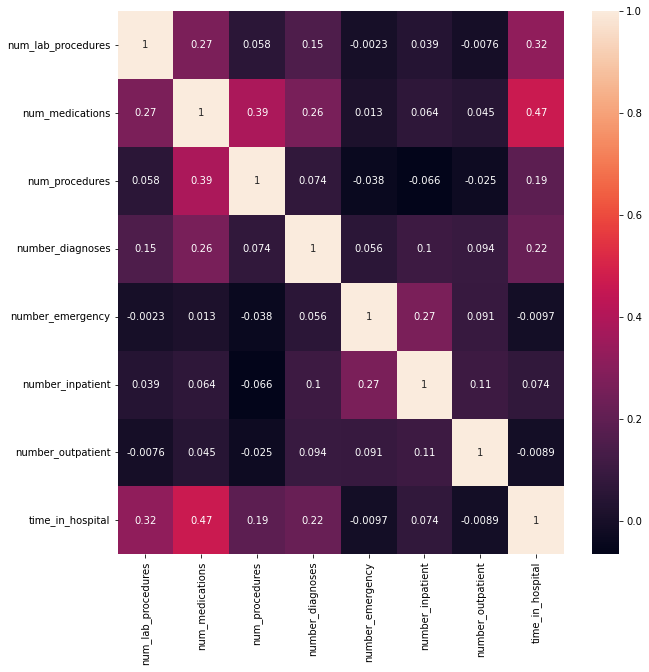

In [13]:
# Which variables are correlated with each other?
corr = diabetes_df[diabetes_df.columns.difference(['encounter_id', 'patient_nbr','admission_type_id',
                                                  'discharge_disposition_id','admission_source_id'])].corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot = True, ax=ax)

In [14]:
# Simple statistical regression model to understand beta coefficients for some data points

train_cols=['num_procedures', 'num_medications','num_lab_procedures','time_in_hospital','number_outpatient',
               'number_emergency','number_diagnoses','number_inpatient']

# Recode readmitted to binary for model
diabetes_df["readmission"]= np.where(diabetes_df["readmitted"] == '<30',1,0)
logit = sm.Logit(diabetes_df['readmission'], diabetes_df[train_cols])

# fit the model
result = logit.fit()
print (result.summary2())

Optimization terminated successfully.
         Current function value: 0.360832
         Iterations 6
                          Results: Logit
Model:                Logit            Pseudo R-squared: -0.031    
Dependent Variable:   readmission      AIC:              73456.9204
Date:                 2022-06-13 11:41 BIC:              73533.1638
No. Observations:     101766           Log-Likelihood:   -36720.   
Df Model:             7                LL-Null:          -35602.   
Df Residuals:         101758           LLR p-value:      1.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
num_procedures     -0.0548   0.0066  -8.2692 0.0000 -0.0678 -0.0418
num_medications    -0.0071   0.0015  -4.6

In [15]:
# Average measurements by race

q = """Select 
       race,
       AVG(num_procedures) as mean_num_procedures,
       AVG(num_medications) as mean_num_medications,
       AVG(num_lab_procedures) as mean_num_lab_procedures,
       AVG(time_in_hospital) as average_time_in_hospital,
       AVG(number_outpatient) as mean_outpatient_visits,
       AVG(number_emergency) as mean_emergency_visits,
       AVG(number_diagnoses) as mean_number_diagnoses,
       AVG(number_inpatient) as mean_number_inpatient
       from diabetes_df
       group by race"""
average_measurements_by_race = sqldf(q)
print(average_measurements_by_race)

              race  mean_num_procedures  mean_num_medications  \
0                ?             1.302684             15.813462   
1  AfricanAmerican             1.234669             15.368922   
2            Asian             1.344774             13.291732   
3        Caucasian             1.369466             16.285733   
4         Hispanic             1.116838             14.030437   
5            Other             1.532537             15.185923   

   mean_num_lab_procedures  average_time_in_hospital  mean_outpatient_visits  \
0                44.104707                  4.289485                0.194457   
1                44.085060                  4.507860                0.239927   
2                41.212168                  3.995320                0.165367   
3                42.832941                  4.385721                0.412410   
4                42.793324                  4.059892                0.324497   
5                43.436919                  4.273572            

In [16]:
# Measurements by readmission status
qb = """Select 
       readmitted,
       AVG(num_procedures) as mean_num_procedures,
       AVG(num_medications) as mean_num_medications,
       AVG(num_lab_procedures) as mean_num_lab_procedures,
       AVG(time_in_hospital) as average_time_in_hospital,
       AVG(number_outpatient) as mean_outpatient_visits,
       AVG(number_emergency) as mean_emergency_visits,
       AVG(number_diagnoses) as mean_number_diagnoses,
       AVG(number_inpatient) as mean_number_inpatient
       from diabetes_df
       group by readmitted"""

average_measurements_by_readmission = sqldf(qb)


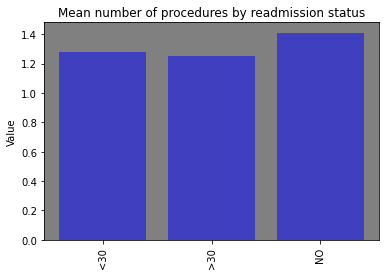

In [17]:
labels = (np.array(average_measurements_by_readmission.readmitted))
y_pos=np.arange(len(labels))

graph(labels=labels,data=average_measurements_by_readmission['mean_num_procedures'],
      color='blue',title='Mean number of procedures by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')

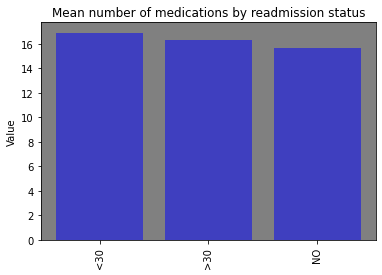

In [18]:
graph(labels=labels,data=average_measurements_by_readmission['mean_num_medications'],
      color='blue',title='Mean number of medications by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')

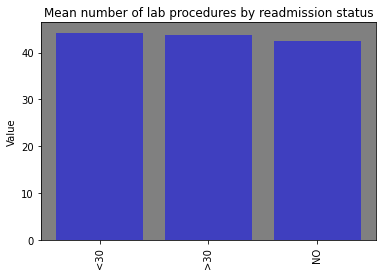

In [19]:
graph(labels=labels,data=average_measurements_by_readmission['mean_num_lab_procedures'],
      color='blue',title='Mean number of lab procedures by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')

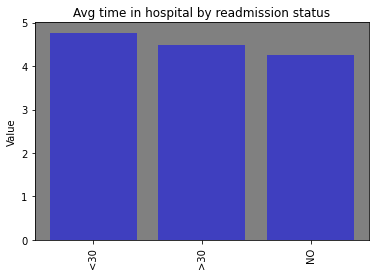

In [20]:
graph(labels=labels,data=average_measurements_by_readmission['average_time_in_hospital'],
      color='blue',title='Avg time in hospital by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')

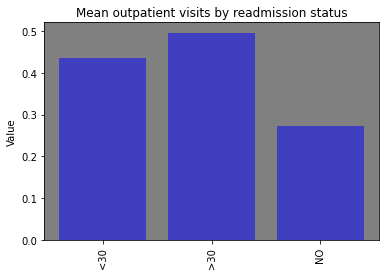

In [21]:
graph(labels=labels,data=average_measurements_by_readmission['mean_outpatient_visits'],
      color='blue',title='Mean outpatient visits by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')

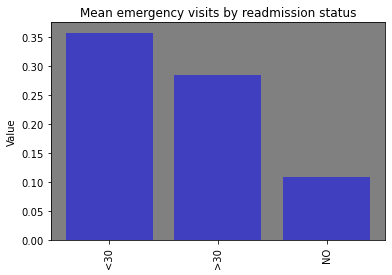

In [22]:
graph(labels=labels,data=average_measurements_by_readmission['mean_emergency_visits'],
      color='blue',title='Mean emergency visits by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')

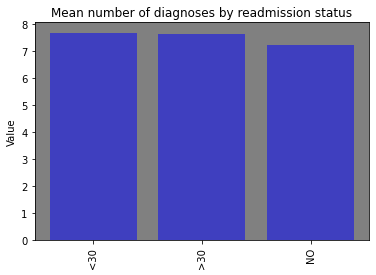

In [24]:
graph(labels=labels,data=average_measurements_by_readmission['mean_number_diagnoses'],
      color='blue',title='Mean number of diagnoses by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')

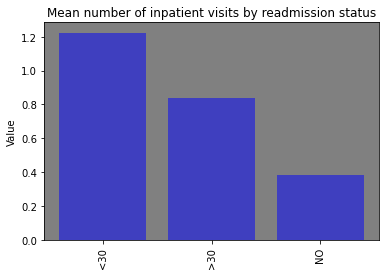

In [25]:
graph(labels=labels,data=average_measurements_by_readmission['mean_number_inpatient'],
      color='blue',title='Mean number of inpatient visits by readmission status',ylabel='Value',y_pos=y_pos,
      graph_type='bar')

      weight  total_individuals  readmitted_individuals  \
6    [25-50)                 94                       8   
4  [125-150)                136                      13   
7  [150-175)                 35                       4   
2    [50-75)                814                      94   
3  [100-125)                585                      68   
1   [75-100)               1238                     149   
0          ?              68688                    8503   
5     [0-25)                 47                       9   
8  [175-200)                 10                       2   
9       >200                  3                       1   

   percentage_of_individuals_readmitted  
6                              8.510638  
4                              9.558824  
7                             11.428571  
2                             11.547912  
3                             11.623932  
1                             12.035541  
0                             12.379164  
5             

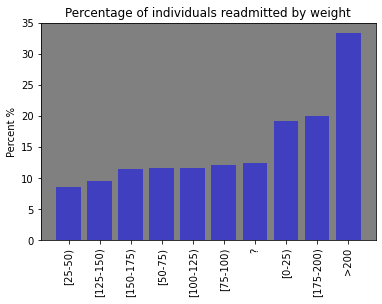

In [29]:
# Weight and readmission status
query0 = """Select weight, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by weight 
       order by readmitted_individuals desc"""
weight_readmitted_patients = sqldf(query0)
weight_readmitted_patients["percentage_of_individuals_readmitted"]= weight_readmitted_patients['readmitted_individuals']/weight_readmitted_patients['total_individuals'] * 100
weight_readmitted_patients= weight_readmitted_patients.sort_values("percentage_of_individuals_readmitted")
print(weight_readmitted_patients)

labels = (np.array(weight_readmitted_patients.weight))
y_pos=np.arange(len(labels))

graph(labels=labels,data=weight_readmitted_patients['percentage_of_individuals_readmitted'],
      color='blue',title='Percentage of individuals readmitted by weight',ylabel='Percent %',y_pos=y_pos,
      graph_type='bar')

              race  total_individuals  readmitted_individuals  \
0        Caucasian              53601                    6741   
1  AfricanAmerican              12932                    1606   
2         Hispanic               1534                     169   
5            Asian                517                      53   
4            Other               1209                     121   
3                ?               1977                     165   

   percentage_of_individuals_readmitted  
0                             12.576258  
1                             12.418806  
2                             11.016949  
5                             10.251451  
4                             10.008271  
3                              8.345979  


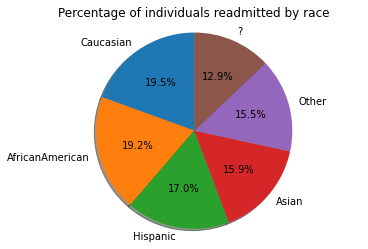

In [32]:
# Race distribution of patients against readmission within 30 days
query1 = """Select race, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
race_readmitted_patients = sqldf(query1)
race_readmitted_patients["percentage_of_individuals_readmitted"]= race_readmitted_patients['readmitted_individuals']/race_readmitted_patients['total_individuals'] * 100
race_readmitted_patients= race_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(race_readmitted_patients)

labels = (np.array(race_readmitted_patients.race))
y_pos=np.arange(len(labels))

graph(labels=labels,data=race_readmitted_patients['percentage_of_individuals_readmitted'],
      title='Percentage of individuals readmitted by race',y_pos=y_pos,
      graph_type='pie')

            gender  total_individuals  readmitted_individuals  \
2  Unknown/Invalid                  3                       1   
0           Female              38026                    4755   
1             Male              33492                    4081   

   percentage_of_individuals_readmitted  
2                             33.333333  
0                             12.504602  
1                             12.184999  


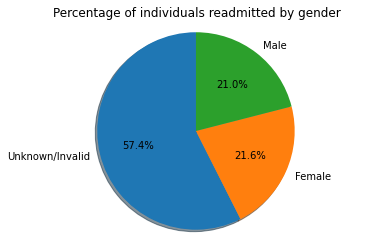

In [33]:
# Gender distribution of patients against readmission within 30 days
query2 = """Select gender, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
gender_readmitted_patients = sqldf(query2)
gender_readmitted_patients["percentage_of_individuals_readmitted"]= gender_readmitted_patients['readmitted_individuals']/gender_readmitted_patients['total_individuals'] * 100
gender_readmitted_patients= gender_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(gender_readmitted_patients)

labels = (np.array(gender_readmitted_patients.gender))
y_pos=np.arange(len(labels))

graph(labels=labels,data=gender_readmitted_patients['percentage_of_individuals_readmitted'],
      title='Percentage of individuals readmitted by gender',y_pos=y_pos,
      graph_type='pie')

        age  total_individuals  readmitted_individuals  \
9    [0-10)                154                       4   
8   [10-20)                536                      33   
3   [50-60)              12666                    1266   
4   [40-50)               6956                     713   
5   [30-40)               2727                     289   
7   [20-30)               1138                     124   
1   [60-70)              16281                    1989   
6  [90-100)               2042                     261   
0   [70-80)              18584                    2516   
2   [80-90)              12008                    1726   

   percentage_of_individuals_readmitted  
9                              2.597403  
8                              6.156716  
3                              9.995263  
4                             10.250144  
5                             10.597726  
7                             10.896309  
1                             12.216694  
6                        

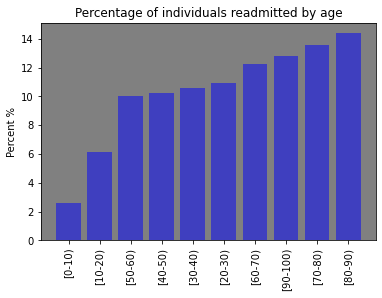

In [35]:
# Age distribution of patients against readmission within 30 days
query3 = """Select age, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
age_readmitted_patients = sqldf(query3)
age_readmitted_patients["percentage_of_individuals_readmitted"]= age_readmitted_patients['readmitted_individuals']/age_readmitted_patients['total_individuals'] * 100
age_readmitted_patients= age_readmitted_patients.sort_values("percentage_of_individuals_readmitted")
print(age_readmitted_patients)

labels = (np.array(age_readmitted_patients.age))
y_pos=np.arange(len(labels))

graph(labels=labels,data=age_readmitted_patients['percentage_of_individuals_readmitted'],
      color='blue',title='Percentage of individuals readmitted by age',ylabel='Percent %',y_pos=y_pos,
      graph_type='bar')

  diabetesMed  total_individuals  readmitted_individuals  \
1          No              19580                    1917   
0         Yes              56178                    7230   

   percentage_of_individuals_readmitted  
1                              9.790603  
0                             12.869807  


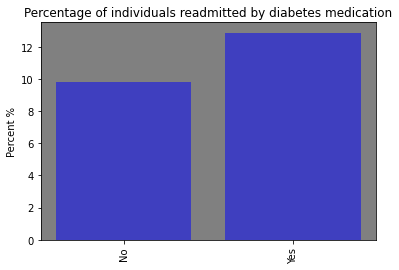

In [36]:
# Is diabetes medication related to readmission within 30 days?
query4 = """Select diabetesMed, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
diabetes_readmitted_patients = sqldf(query4)
diabetes_readmitted_patients["percentage_of_individuals_readmitted"]= diabetes_readmitted_patients['readmitted_individuals']/diabetes_readmitted_patients['total_individuals'] * 100
diabetes_readmitted_patients= diabetes_readmitted_patients.sort_values("percentage_of_individuals_readmitted")
print(diabetes_readmitted_patients)

labels = (np.array(diabetes_readmitted_patients.diabetesMed))
y_pos=np.arange(len(labels))

graph(labels=labels,data=diabetes_readmitted_patients['percentage_of_individuals_readmitted'],
      color='blue',title='Percentage of individuals readmitted by diabetes medication',ylabel='Percent %',y_pos=y_pos,
      graph_type='bar')

  admission_type_id_description  total_individuals  readmitted_individuals  \
6                       Newborn                 10                       2   
0                     Emergency              39879                    5031   
4                 Not Available               3364                     412   
1                        Urgent              15367                    1802   
3                          NULL               4697                     537   
2                      Elective              16325                    1746   
5                          None                318                      28   
7                 Trauma Center                 21                       1   

   percentage_of_individuals_readmitted  
6                             20.000000  
0                             12.615662  
4                             12.247325  
1                             11.726427  
3                             11.432829  
2                             10.695253  
5  

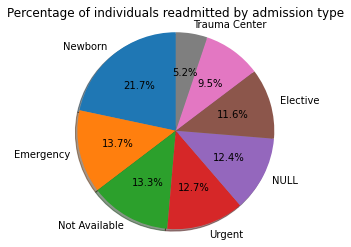

In [37]:
# Does admission type affect readmission within 30 days?
query5 = """Select admission_type_id_description, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
admission_readmitted_patients = sqldf(query5)
admission_readmitted_patients["percentage_of_individuals_readmitted"]= admission_readmitted_patients['readmitted_individuals']/admission_readmitted_patients['total_individuals'] * 100
admission_readmitted_patients= admission_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(admission_readmitted_patients)

labels = (np.array(admission_readmitted_patients.admission_type_id_description))
y_pos=np.arange(len(labels))

graph(labels=labels,data=admission_readmitted_patients['percentage_of_individuals_readmitted'],
      title='Percentage of individuals readmitted by admission type',y_pos=y_pos,
      graph_type='pie')

  A1Cresult  total_individuals  readmitted_individuals  \
2      Norm               4728                     471   
1        >8               7427                     760   
3        >7               3664                     378   
0      None              60910                    7594   

   percentage_of_individuals_readmitted  
2                              9.961929  
1                             10.232934  
3                             10.316594  
0                             12.467575  


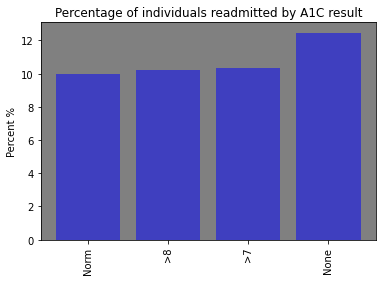

In [39]:
# Does A1C result affect readmission within 30 days
query6= """Select A1Cresult, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
a1c_readmitted_patients = sqldf(query6)
a1c_readmitted_patients["percentage_of_individuals_readmitted"]= a1c_readmitted_patients['readmitted_individuals']/a1c_readmitted_patients['total_individuals'] * 100
a1c_readmitted_patients= a1c_readmitted_patients.sort_values("percentage_of_individuals_readmitted")
print(a1c_readmitted_patients)

labels = (np.array(a1c_readmitted_patients.A1Cresult))
y_pos=np.arange(len(labels))

graph(labels=labels,data=a1c_readmitted_patients['percentage_of_individuals_readmitted'],
      color='blue',title='Percentage of individuals readmitted by A1C result',ylabel='Percent %',y_pos=y_pos,
      graph_type='bar')

  medications_status  total_individuals  readmitted_individuals  \
2               down               6841                    1031   
3                 up               6864                     984   
0             steady              47171                    5702   
1     not_prescribed              19580                    1917   

   percentage_of_individuals_readmitted  
2                             15.070896  
3                             14.335664  
0                             12.087935  
1                              9.790603  


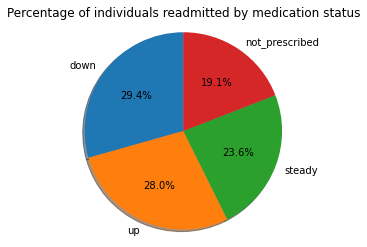

In [40]:
# Look at all different medications
medications=['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone']

diabetes_df["medications_status"] = np.where(diabetes_df[medications][diabetes_df == "Steady"].any(1), 'steady', 
                             np.where(diabetes_df[medications][diabetes_df == "Up"].any(1), 'up' ,
                             np.where(diabetes_df[medications][diabetes_df == "Down"].any(1), 'down',
                             np.where(diabetes_df[medications][diabetes_df == "No"].any(1), 'not_prescribed','unknown'))))

# Did medications_status lead to readmission?
query7= """Select medications_status, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
medication_status_readmitted_patients = sqldf(query7)
medication_status_readmitted_patients["percentage_of_individuals_readmitted"]= medication_status_readmitted_patients['readmitted_individuals']/medication_status_readmitted_patients['total_individuals'] * 100
medication_status_readmitted_patients= medication_status_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(medication_status_readmitted_patients)

labels = (np.array(medication_status_readmitted_patients.medications_status))
y_pos=np.arange(len(labels))

graph(labels=labels,data=medication_status_readmitted_patients['percentage_of_individuals_readmitted'],
      title='Percentage of individuals readmitted by medication status',y_pos=y_pos,
      graph_type='pie')

  max_glu_serum  total_individuals  readmitted_individuals  \
2          >300                997                       1   
3          >200               1257                       1   
0          Norm               2000                       1   
1          None              68168                       1   

   percentage_of_individuals_readmitted  
2                              0.100301  
3                              0.079554  
0                              0.050000  
1                              0.001467  


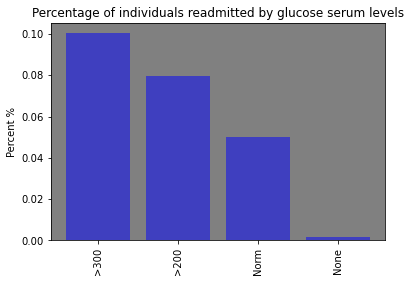

In [58]:
# Did glucose serum levels lead to readmission?
query8= """Select max_glu_serum, 
        count (distinct patient_nbr) as total_individuals, 
        count(distinct (case when readmitted="<30"then patient_nbr else 0 end)) as readmitted_individuals
       from diabetes_df group by 1 
       order by readmitted_individuals desc"""
gluserum_readmitted_patients = sqldf(query8)
gluserum_readmitted_patients["percentage_of_individuals_readmitted"]= gluserum_readmitted_patients['readmitted_individuals']/gluserum_readmitted_patients['total_individuals'] * 100
gluserum_readmitted_patients= gluserum_readmitted_patients.sort_values("percentage_of_individuals_readmitted",ascending=False)
print(gluserum_readmitted_patients)

labels = (np.array(gluserum_readmitted_patients.max_glu_serum))
y_pos=np.arange(len(labels))

graph(labels=labels,data=gluserum_readmitted_patients['percentage_of_individuals_readmitted'],
      color='blue',title='Percentage of individuals readmitted by glucose serum levels',ylabel='Percent %',y_pos=y_pos,
      graph_type='bar')

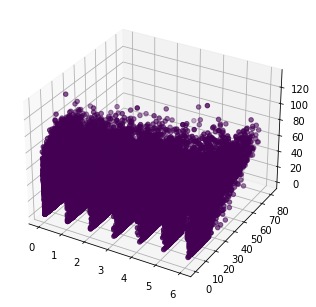

In [57]:
# Clustering kmeans on same features
diabetes_df["readmitted"]= np.where(diabetes_df["readmitted"] == '<30',1,0)
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(diabetes_df[train_cols])
# Predicting the clusters
labels = kmeans.predict(diabetes_df[train_cols])
# Getting the cluster centers
C = kmeans.cluster_centers_
X=diabetes_df[train_cols]
y=diabetes_df["readmitted"]

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)